In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.feature_extraction.text import TfidfVectorizer
from src.text_factorization import lemmatize_tokens
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score
from src.plot_silhouette import knife_graph
from src.model_analysis import *
%matplotlib inline

In [2]:
df = pd.read_pickle('data/working_corpus.pkl')

In [3]:
df

,special,text,lem_tokens,length,nmf_primary,nmf_secondary,kmn_cluster,MyGroups
0,Billy Connolly High Horse Tour Live,"Ladies and gentlemen, would you please welcome...","[billy, not, well, man, well, word, later, nic...",64226,2,6,2,English
1,Hannah Gadsby Douglas,The following is the transcript of Hannah Gadb...,"[explores, autism, affect, thinking, take, lit...",57454,7,4,2,English
2,Patton Oswalt I Love Everything,This is the full transcript of Patton Oswalt: ...,"[extreme, high, low, last, few, year, actor, c...",45350,6,5,1,NA
3,Russell Peters Deported,[TYPING] [CHEERING] NARRATOR: Ladies and gentl...,"[going, bring, brother, gave, somebody, going,...",57631,6,5,1,NA
4,Jimmy O Yang Good Deal,"ANNOUNCER: Ladies and gentlemen, welcome to th...","[came, party, hows, everybody, doing, yes, yes...",44520,7,3,3,Underdogs
...,...,...,...,...,...,...,...,...
312,George Carlin You Are All Diseased,You Are All Diseased is the 16th album and 11t...,"[february, beacon, theater, new, york, city, t...",49368,5,4,2,English
314,Reggie Watts Spatial,"Hello, Im Thomas. Im so glad to meet you Mum ?...","[beautiful, wanted, kiss, want, kiss, now, you...",21867,5,4,2,English
315,George Carlin Complaints Grievances,Complaints and Grievances is a HBO stand-up sp...,"[lot, people, die, renamed, following, septemb...",43272,5,4,2,English
316,George Carlin Life Is Worth Losing,"Recorded on November 5, 2005, Beacon Theater, ...","[man, thank, thank, thank, thank, very, much, ...",66556,6,4,2,English


In [259]:
lem_tokens = lemmatize_tokens(df['text'])

In [429]:
df['lem_tokens'] = lem_tokens

In [3]:
tf = TfidfVectorizer(max_features=10000, max_df=0.9, ngram_range=(4,10))
corpus_vector = tf.fit_transform(df.lem_tokens.apply(lambda ls: ' '.join(ls))).toarray()

For n_clusters = 2 The average silhouette_score is : 0.01944374925480025
For n_clusters = 3 The average silhouette_score is : 0.017908705005208355
For n_clusters = 4 The average silhouette_score is : 0.01508466045954806
For n_clusters = 5 The average silhouette_score is : 0.014843794283282866
For n_clusters = 6 The average silhouette_score is : 0.014290093130150571
For n_clusters = 7 The average silhouette_score is : 0.010858711413698643
For n_clusters = 8 The average silhouette_score is : 0.01044462211399225
For n_clusters = 9 The average silhouette_score is : 0.01107015537075153
For n_clusters = 10 The average silhouette_score is : 0.014866205444820558
For n_clusters = 11 The average silhouette_score is : 0.012934715039213987


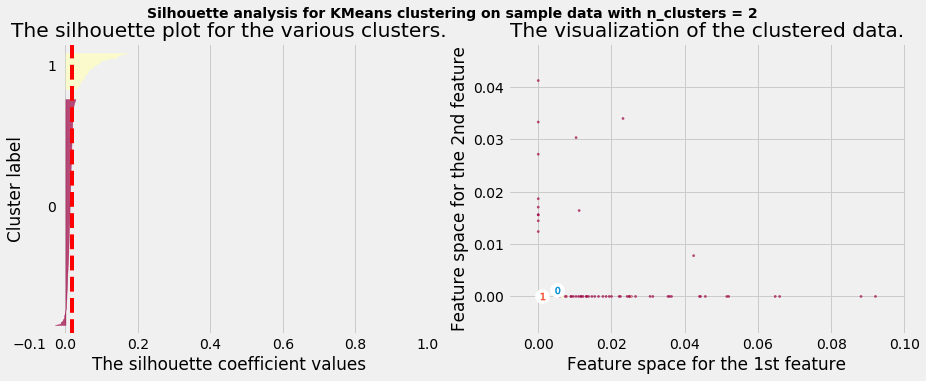

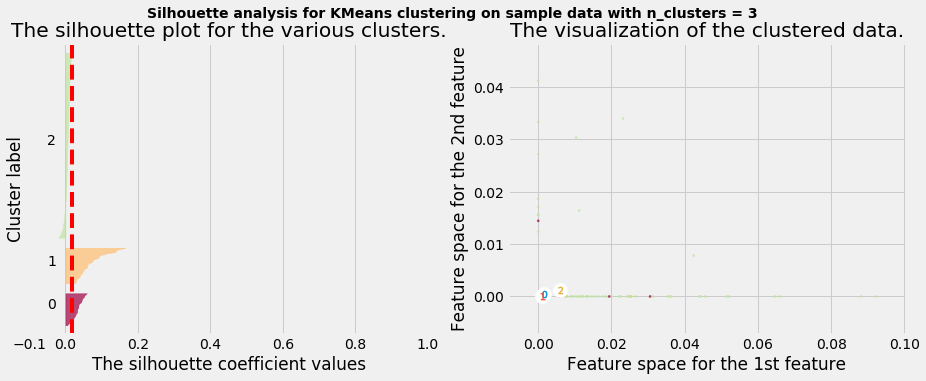

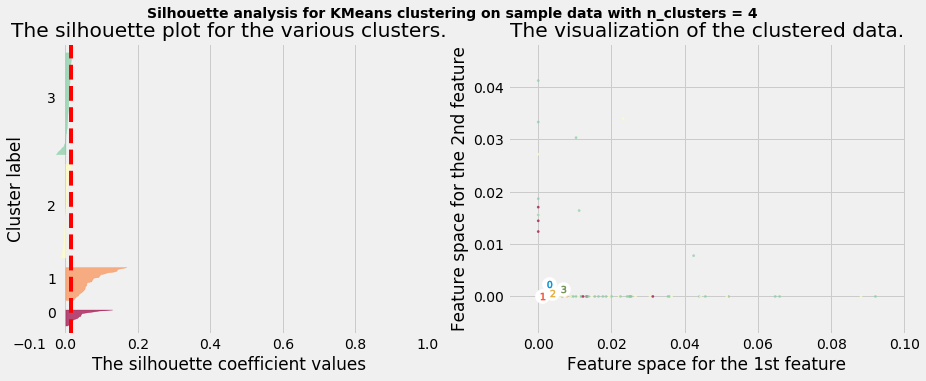

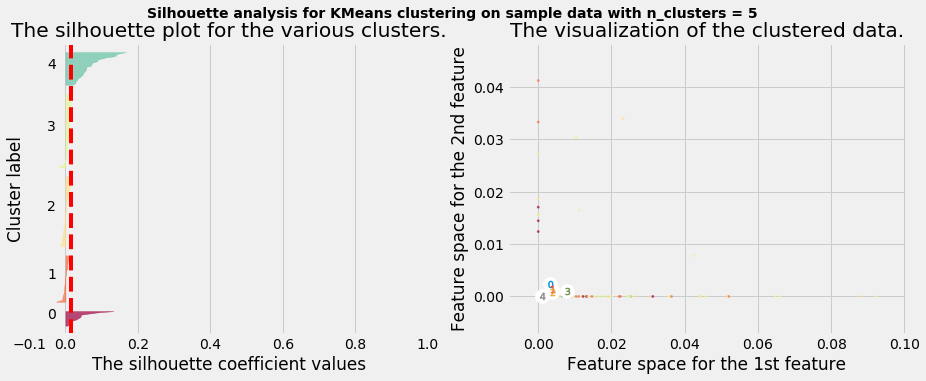

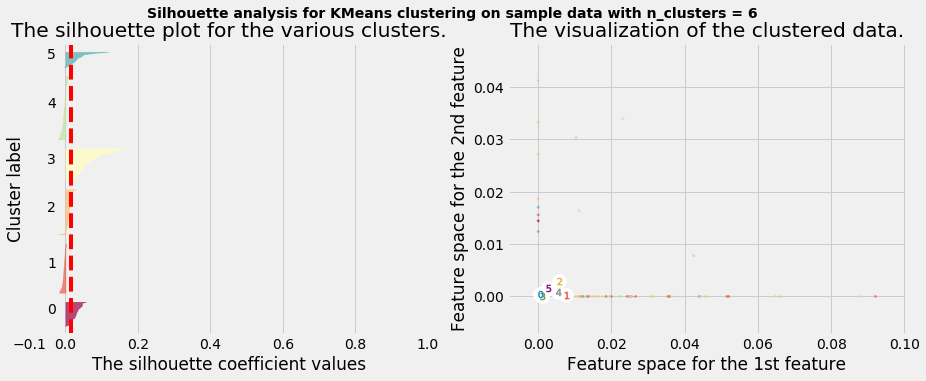

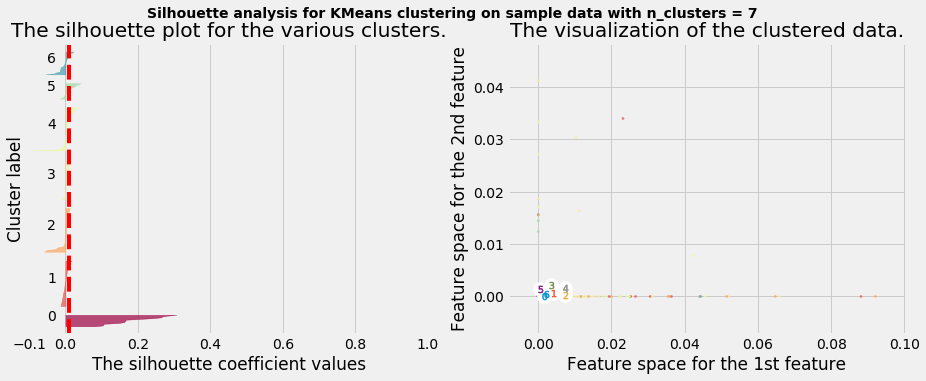

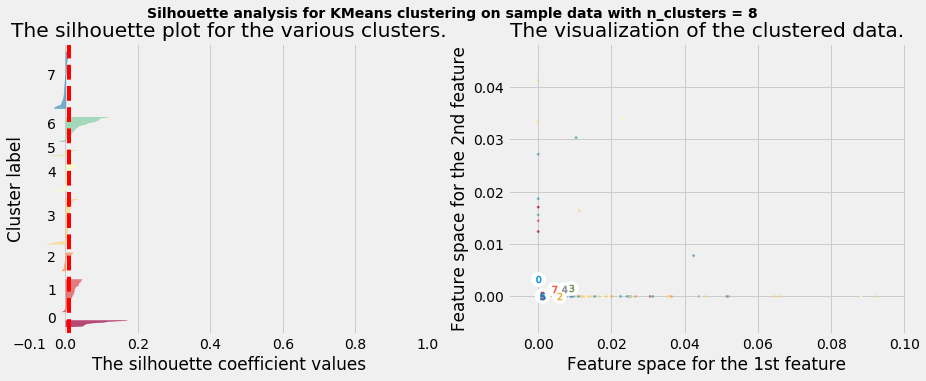

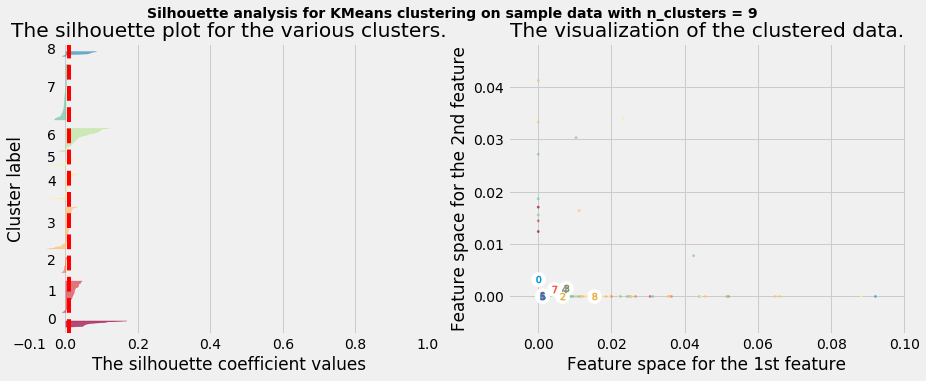

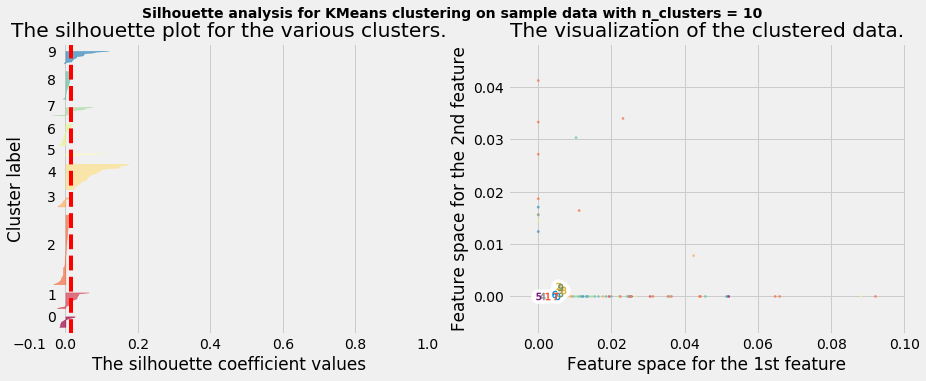

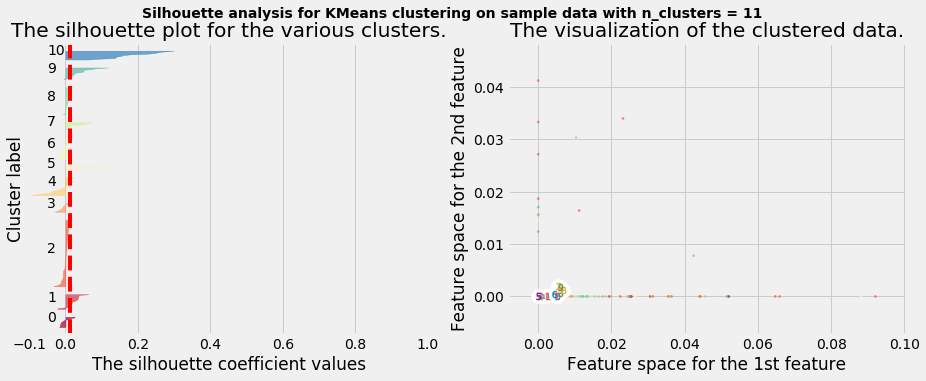

In [305]:
knife_graph(corpus_vector, range(2,12))
plt.show()

In [4]:
n_clusters = 11
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
kmeans_labels = kmeans.fit_predict(corpus_vector)

In [5]:
print_top_words(kmeans, n_clusters, tf.get_feature_names())

Topic 0:
blog blog blog blog, matthew mark luke john, husband died year ago, look look look look, doubt spread em out, mushed up against sink, shut up shut up, not sure what happens, whenever see footage mosque, cock ball between leg, what go mow yard, give out feeling elite, penny pound penny pound, give out feeling elite highly, give out feeling elite highly trained, mime attacking getting distracted, started writing cant stop, need direction back shampoo bottle, need direction back shampoo, toilet paper toilet paper, real mad what fut, husband he puerto rican, give way many detail, look look look look look, youre right go right, ive never done before, another thing ive learned, youre not eating dinner, long time long time, good evening good evening
Topic 1:
gon na gon na, he not gon na, not gon na lie, not gon na anything, dont care dont care, youre not gon na, bunny fell down step, there nothing wrong being, dont wan na see, gon na wan na, ooh ooh ooh ooh, dont want dont want, gon 

In [20]:
#This doesn't seem to be producing as good results
n_components = 10
nmf = NMF(n_components=n_components, alpha=0.0, max_iter=300, random_state=10)
W = nmf.fit_transform(corpus_vector)

In [21]:
print_top_words(nmf, n_components, tf.get_feature_names())

Topic 0:
wan na, wan, wife, dont wan, dont wan na, dog, em, married, na go, youre gon, youre gon na, wedding, not gon, not gon na, cat, bathroom, dude, nobody, food, cream, horse, babe, somebody, bed, coffee, bag, movie, number, pizza, pant
Topic 1:
nigga, yall, motherfucker, aint, bitch, motherfucking, white people, trump, kevin, dave, black people, goddamn, bitch nigga, police, dick, yo, as, nigga dont, chappelle, mama, deray, pussy, oj, jacksonville, hart, iceberg, up nigga, hood, nigga nigga, mad
Topic 2:
co, mate, mum, wee, quite, bloke, er, sort, cunt, ok, london, glasgow, round, lovely, brilliant, lm, lee, anyone, hello, panda, scottish, britain, cock, accent, favourite, weve, girlfriend, shop, shout, gig
Topic 3:
laugh, crowd, chuckle, voice, cheer, horse, crowd laugh, normal voice, laugh go, accent, dog, imitates, yo, dude, ila, laugh dont, audlence, audlence laugh, whoos, speaks, turn head, imitating, marathon, expression, mustache, normal, john, anne frank, haddish, clap
Top

In [7]:
df[(kmeans_labels==0)]

,special,text,lem_tokens,length,genre
12,Jim Norton American Degenerate,This year I wanted the opening of my new speci...,"[not, well, known, understand, very, important...",42025,Situational Comedy
115,Bert Kreischer Secret Time,[applause] [male presenter] Ladies and gentlem...,"[crowd, crowd, louder, yes, crowd, yeah, lower...",44408,Voice Work
149,Adel Karam Live From Beirut,A NETFLIX COMEDY SPECIAL\nRecorded at the Casi...,"[great, great, good, evening, good, evening, g...",34908,"Dirty, Dating"
151,Mike Birbiglia My Girlfriends Boyfriend 2013,"Wow. Hey, thank you. Thanks. Thank you, guys. ...","[look, look, here, crazy, insane, five, year, ...",57950,"Dirty, Dating"
165,Eddie Izzard Unrepeatable,Recorded at the Albery Theatre in March 1994 1...,"[eh, hello, hum, tune, yes, showtime, hum, ope...",64435,British Conversationalists
170,Jimmy Carr Funny Business,[classical music playing] [applauding and chee...,"[safe, hand, evening, ive, doing, comedy, now,...",53208,British Conversationalists
179,Ellen Degeneres The Beginning 2000,"Ladies and gentlemen, please, welcome Ellen De...","[yeah, woo, very, emotional, night, idea, ehm,...",40321,Situational Comedy
194,Anjelah Johnson Not Fancy,Not Fancy was filmed at the City National Grov...,"[talk, touring, prepping, trip, europe, wardro...",37803,Topical American
305,Jim Jefferies Freedumb 2016,[rock music playing] [audience cheering] [Jim ...,"[right, down, down, joke, tell, come, chuckle,...",60988,British Political


In [151]:
genre_dict = {
    0: 'Short Jokes',
    1: 'British Conversationalists',
    2: 'Situational Comedy',
    3: 'Topical American',
    4: 'Black: Lots of Race',
    5: 'British Political', #This category is just a handful of Carlin specials
    6: 'British Political',
    7: 'US Outsider',
    8: 'Dirty, Dating',
    9: 'Voice Work',
    10: 'Black: DefJam-Adjacent'
}

df['genre'] = [genre_dict[label] for label in kmeans_labels]
df.head()

,special,text,lem_tokens,length,genre
0,Billy Connolly High Horse Tour Live,"Ladies and gentlemen, would you please welcome...","[billy, not, well, man, well, word, later, nic...",64226,British Political
1,Hannah Gadsby Douglas,The following is the transcript of Hannah Gadb...,"[explores, autism, affect, thinking, take, lit...",57454,British Conversationalists
2,Patton Oswalt I Love Everything,This is the full transcript of Patton Oswalt: ...,"[extreme, high, low, last, few, year, actor, c...",45350,Situational Comedy
3,Russell Peters Deported,[TYPING] [CHEERING] NARRATOR: Ladies and gentl...,"[going, bring, brother, gave, somebody, going,...",57631,US Outsider
4,Jimmy O Yang Good Deal,"ANNOUNCER: Ladies and gentlemen, welcome to th...","[came, party, hows, everybody, doing, yes, yes...",44520,US Outsider


In [152]:
df.to_pickle('data/working_corpus.pkl')